# Selecting Variables for Classifying Algorithms

In [85]:
import pandas
import matplotlib.pyplot as plt
import numpy
import seaborn as sns

## Import Excel File

In [114]:
analyzed = pandas.read_csv('analyzed_by_both.csv', delimiter=',', encoding='latin-1')

## Select Variables by Spearman Calculations

In [112]:
corr = analyzed.corr('spearman')['near_miss']
corr = corr.sort_values(ascending=False)
corr = corr[corr>0.15]
corr

near_miss                                 1.000000
incident_description_ctakes_pronouns      0.238092
incident_description_nltk_PRP             0.219368
descriptor_nltk_EX                        0.216565
incident_description_ctakes_all           0.214923
incident_description_nltk_WP$             0.211908
incident_description_hapex_dislegomena    0.182419
incident_description_nltk_EX              0.181144
incident_description_nltk_DT              0.177357
incident_description_nltk_WP              0.175819
incident_description_hapex_legomena       0.173438
incident_description_ctakes_procedure     0.161125
incident_description_ctakes_symptom       0.151319
Name: near_miss, dtype: float64

## Comments
[Click here](https://www.ling.upenn.edu/courses/Fall_2003/ling001/penn_treebank_pos.html) for a link to what each tag means.

The above variables correlate with the "near_miss" column the most. The correlations are weak, which means that the count of any single tag does not indicate the event type very much. This is reflected in the below histograms, in which the overlap is almost complete; as well as in the heatmap below.

It is noteworthy that the number of pronouns is a strong indicator of whether the entry is a near miss, as 'incident_description_ctakes_pronouns', 'incident_description_nltk_PRP', 'incident_description_nltk_WP', and 'incident_description_nltk_WP' are all variations of the number of pronouns. Only one should be selected as a variable for subsequent classifying algorithms.

In [83]:
def histogram(title, xlabel, column):
    seaborn.set_style('white')
    plt.hist(analyzed.loc[analyzed['near_miss']==0, column], label='Other')
    plt.hist(analyzed.loc[analyzed['near_miss']==1, column], label='Near Misses')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Count')
    plt.savefig(column+'.png')
    plt.legend(loc='upper right')
    plt.show()

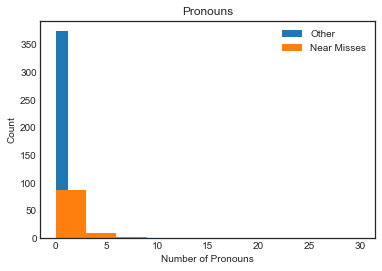

In [84]:
histogram('Pronouns', 'Number of Pronouns', 'incident_description_ctakes_pronouns')

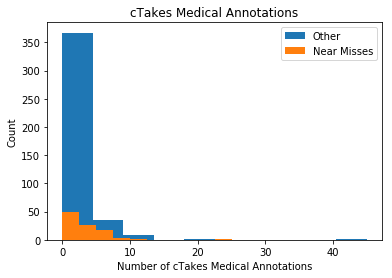

In [80]:
histogram('cTakes Medical Annotations', 'Number of cTakes Medical Annotations', 'incident_description_ctakes_all')

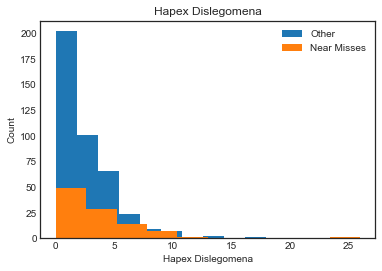

In [110]:
histogram('Hapex Dislegomena', 'Hapex Dislegomena', 'incident_description_hapex_dislegomena')

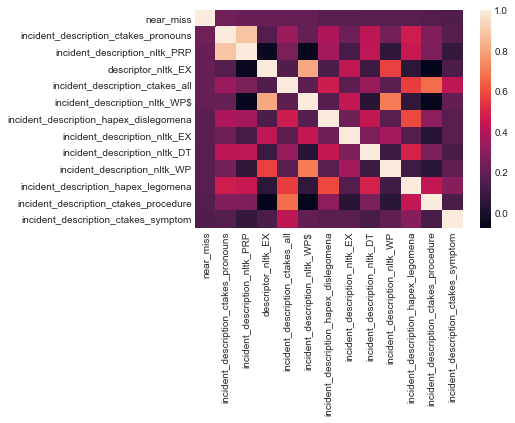

In [108]:
ax = sns.heatmap(analyzed[corr.index].corr('spearman'))
plt.show()

## Conclusion
More sophisticated algorithms are needed for classification.